In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
url = "/content/glass (1).csv"
column_names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_data = pd.read_csv(url, names=column_names)

In [ ]:
glass_data.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,215,215,215,215,215,215,215,215,215,215
unique,179,143,95,119,134,66,144,35,33,7
top,1.52152,13.21,0,1.54,73.11,0,8.03,0,0,2
freq,3,5,42,8,4,30,5,176,144,76


In [ ]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RI      215 non-null    object
 1   Na      215 non-null    object
 2   Mg      215 non-null    object
 3   Al      215 non-null    object
 4   Si      215 non-null    object
 5   K       215 non-null    object
 6   Ca      215 non-null    object
 7   Ba      215 non-null    object
 8   Fe      215 non-null    object
 9   Type    215 non-null    object
dtypes: object(10)
memory usage: 16.9+ KB


In [ ]:
glass_data.isnull().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass_data = glass_data.dropna()

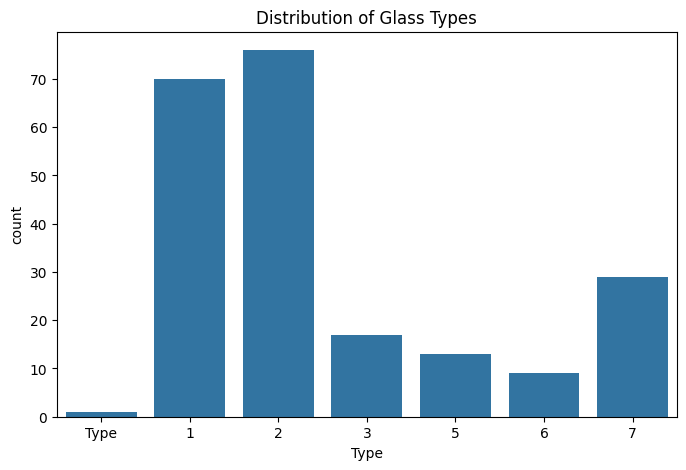

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=glass_data)
plt.title('Distribution of Glass Types')
plt.show()

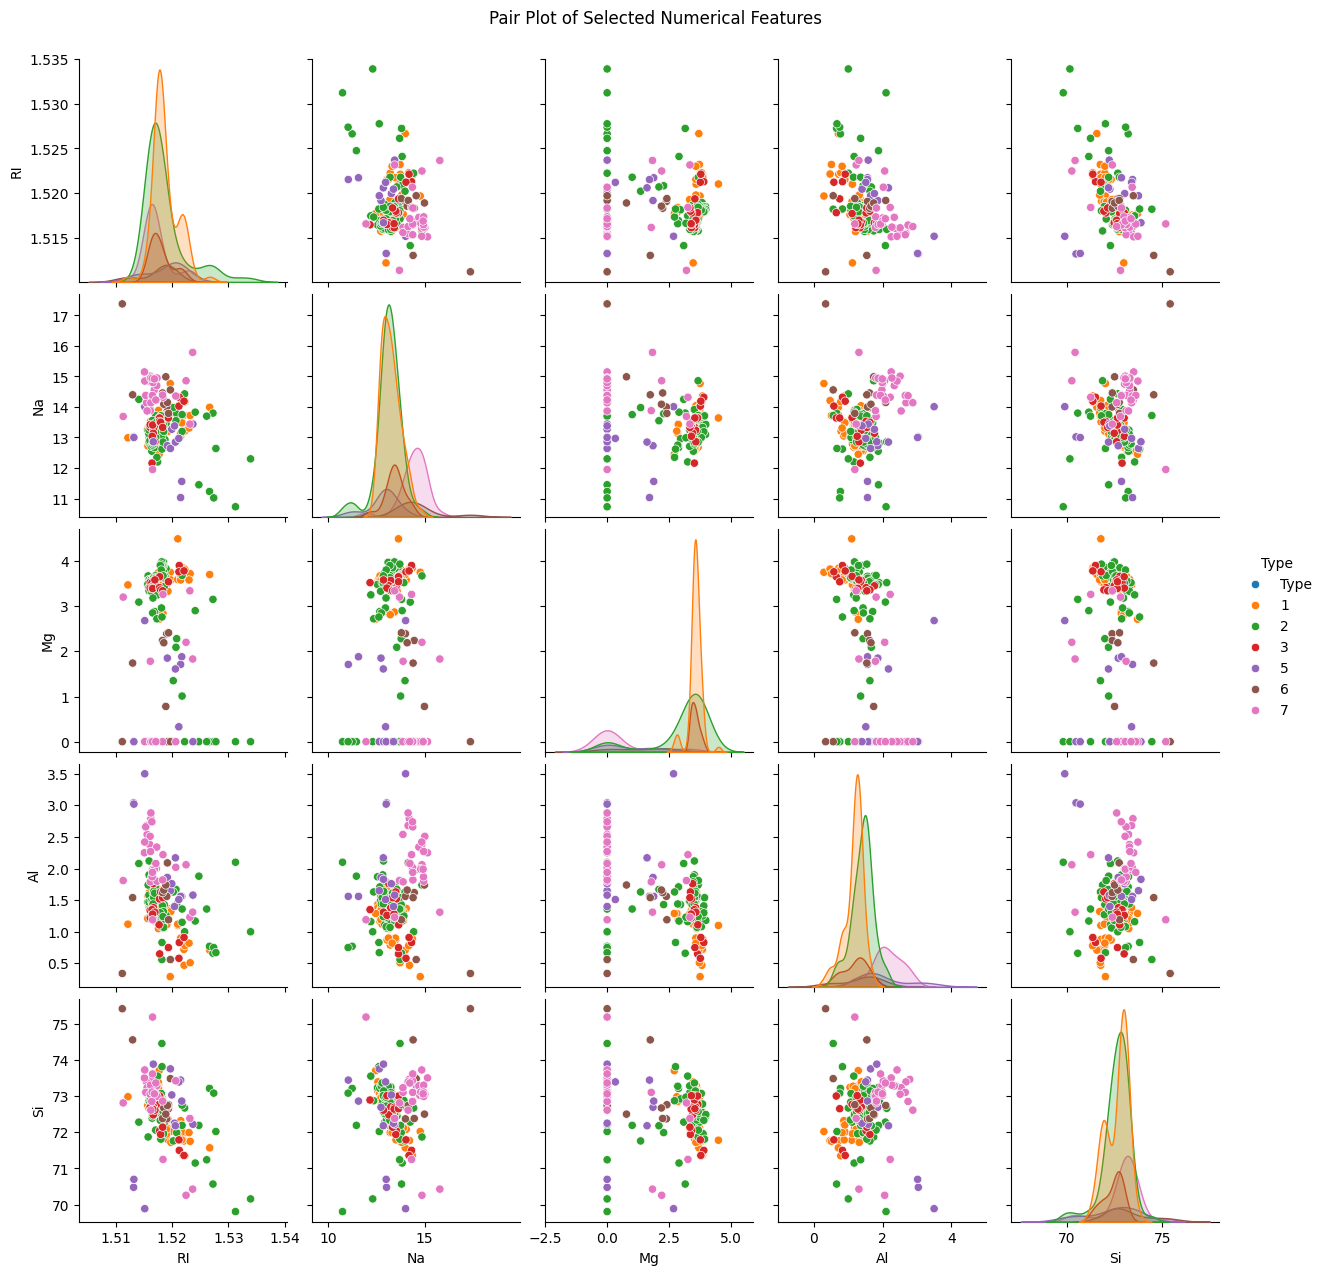

In [ ]:
# Select a subset of numerical columns for pair plots
selected_numerical_columns = ['RI', 'Na', 'Mg', 'Al', 'Si']

# Convert selected numerical columns to numeric type
glass_data[selected_numerical_columns] = glass_data[selected_numerical_columns].apply(pd.to_numeric, errors='coerce')

# Visualize pair plots for selected numerical features
sns.pairplot(glass_data, hue='Type', vars=selected_numerical_columns, diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

In [ ]:
column_name = ['K','Ca','Ba','Fe']
glass_data[column_name] = glass_data[column_name].apply(pd.to_numeric, errors='coerce')


In [ ]:
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train[~y_train.isnull()]
y_train = y_train.dropna()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
k_values = range(1, 10)
accuracy_scores = []


In [ ]:
print(np.isnan(X_train_scaled).sum())

9


In [ ]:
nan_indices = np.isnan(X_train_scaled).any(axis=1)
# Drop rows with NaN values
X_train_scaled = X_train_scaled[~nan_indices]
y_train = y_train[~nan_indices]

In [ ]:
# Iterate over different K values
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [91]:
optimal_k = 6

In [92]:
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [93]:
y_pred = knn_classifier.predict(X_test_scaled)


In [94]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with optimal K ({optimal_k}): {accuracy:.2f}')

Accuracy with optimal K (6): 0.60


In [95]:
cv_scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)



In [96]:
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.74285714 0.70588235 0.70588235 0.73529412 0.55882353]
Mean Accuracy: 0.689747899159664


In [97]:
#hyperparameter tuning
param_grid = {
    'n_neighbors': range(1, 21),  # Adjust the range as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_



In [98]:
best_params

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [99]:
# Initialize the KNN classifier with best hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                       weights=best_params['weights'],
                                       p=best_params['p'])

In [100]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8, p=1, weights='distance')

In [101]:
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [102]:
'''After plotting the eblow plot and choosing K as 6, we fit the model and get an accuracy of 0.60
Upon implimenting hyperparameter tuning, we get the optimum parameters as 'K': 8, 'p': 1, 'weights': 'distance'
with an accuracy of 0.67. Checking the accuracy of the model with parameters as 'K': 6, 'p': 1, 'weights': 'distance' '''

"After plotting the eblow plot and choosing K as 6, we fit the model and get an accuracy of 0.60\nUpon implimenting hyperparameter tuning, we get the optimum parameters as 'K': 8, 'p': 1, 'weights': 'distance'\nwith an accuracy of 0.67. Checking the accuracy of the model with parameters as 'K': 6, 'p': 1, 'weights': 'distance' "

In [103]:
knn_classifier = KNeighborsClassifier(n_neighbors=6,
                                       weights=best_params['weights'],
                                       p=best_params['p'])
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


In [104]:
'''The model with the best accuracy has parameters 'K': 6, 'p': 1, 'weights': 'distance'. This is the final model'''

"The model with the best accuracy has parameters 'K': 6, 'p': 1, 'weights': 'distance'. This is the final model"